In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [33]:
from datasets.nuscenes import *

from tools.utils import *
from tools.geometry import *
from models.model import Model
from time import time, sleep

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [42]:
nd = compile_data(True, "mini", "../../data/nuscenes", "vehicle", batch_size=4, num_workers=1)

In [46]:
nd.dataset.gen_labels = False
ndi = iter(nd)

In [47]:
images, segs, depths, intrinsics, extrinsics, labels = next(ndi)

In [48]:
images.shape

torch.Size([4, 6, 3, 224, 480])

In [ ]:
plt.imshow(depths[2], cmap="jet")
plt.axis("off")

In [ ]:
plt.imshow(segs[2], cmap="viridis")
plt.axis("off")

(-0.5, 479.5, 223.5, -0.5)

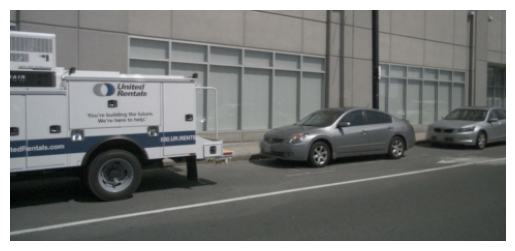

In [55]:
plt.imshow(nd.dataset.denormalize_image(images[3, 0]), cmap='jet')
plt.axis("off")

In [60]:
model = Model([7], backbone='fiery')
model.eval()
model.load(torch.load("../outputs/fiery/19.pt"))

Loaded pretrained weights for efficientnet-b4


FileNotFoundError: [Errno 2] No such file or directory: '../outputs/fiery/19.pt'

In [18]:
model_u = Model([6], backbone='sucam')         
model_u.eval()
# model_u.load(torch.load("../outputs_new/sucam_depth_sched/19.pt"))

Loaded pretrained weights for efficientnet-b4


Model(
  (backbone): DataParallel(
    (module): SUCAM(
      (encoder): Encoder(
        (backbone): EfficientNet(
          (_conv_stem): Conv2dStaticSamePadding(
            3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
            (static_padding): ZeroPad2d((0, 1, 0, 1))
          )
          (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (_blocks): ModuleList(
            (0): MBConvBlock(
              (_depthwise_conv): Conv2dStaticSamePadding(
                48, 48, kernel_size=(3, 3), stride=[1, 1], groups=48, bias=False
                (static_padding): ZeroPad2d((1, 1, 1, 1))
              )
              (_bn1): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
              (_se_reduce): Conv2dStaticSamePadding(
                48, 12, kernel_size=(1, 1), stride=(1, 1)
                (static_padding): Identity()
              )
              (_se_exp

In [ ]:
b, c = depths.shape[:2]
depths[depths == -1] = 0
gt_depth = F.one_hot(depths, num_classes=112).permute(0, 1, 4, 2, 3)
gt_depth = gt_depth.view(b*c, 112, 28, 60)
upred, usg, upd, ux = model_u.backbone(images, intrinsics, extrinsics, gt_depth=gt_depth)

In [ ]:
upred, usg, upd = model_u.backbone(images, intrinsics, extrinsics)

In [ ]:
pred, sg, pd = model.backbone(images, intrinsics, extrinsics)

In [ ]:
plt.imshow(1-upred[0, 0].sigmoid().detach().cpu())
plt.axis("off")

In [ ]:
plt.imshow(1-pred[2, 0].sigmoid().detach().cpu())
plt.axis("off")

In [ ]:
plt.imshow(1-labels[0, 0].detach().cpu())
plt.axis("off")

In [ ]:
dpd = depths.view(24, 28, 60)
aupd = upd.argmax(dim=1).cpu()
aupd[dpd==-1] = -1

In [ ]:
(.float() - upd.argmax(dim=1).cpu()).mean()

In [ ]:
upd.argmax(dim=1).shape

In [ ]:
plt.imshow(depths[0, 4].cpu(), vmin=0, vmax=112, cmap="jet")
plt.axis("off")

In [ ]:
print(depths[0, 3, 1, 1])

In [ ]:
plt.imshow(pd[4].argmax(dim=0).detach().cpu(), cmap="jet")
plt.axis("off")

In [ ]:
plt.imshow(upd[2].argmax(dim=0).detach().cpu(), vmin=0, vmax=112, cmap="jet")
plt.axis("off")

In [ ]:
plt.imshow(images[0, 2].permute(1, 2, 0).cpu().numpy(), cmap='jet')
plt.axis("off")

In [ ]:
plt.imshow(depths[0, 1].cpu().numpy(), cmap='jet')
plt.axis("off")

In [ ]:
plt.imshow((ux[2].mean(dim=0).detach().cpu()).abs().sqrt(), vmin=0, cmap="magma")
plt.axis("off")

In [ ]:
plt.imshow((x[2].mean(dim=0).detach().cpu()).abs(), vmin=0, cmap="magma")
plt.axis("off")

In [ ]:
plt.imshow(pd[0].amax(dim=0).detach().cpu().numpy(), cmap='jet')
plt.axis("off")

In [ ]:
plt.imshow(((x[2].mean(dim=0).detach().cpu()).abs()+1e-5).log(), cmap="magma")
plt.axis("off")